# INTRODUCTION TO GEOPANDAS - EXERCISES

In [1]:
import zipfile, io
import urllib
import os
from matplotlib import pyplot as plt  #to avoid the warning message by plotting the geometries
import warnings
warnings.simplefilter("ignore")

In [2]:
import os
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.0
  import geopandas as gpd
if gpd.__version__ != "0.10.0":
  !pip install -U geopandas==0.10.0
  import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.6 MB/s 
     |████████████████████████████████| 16.7 MB 42.9 MB/s 
     |████████████████████████████████| 6.3 MB 28.6 MB/s 


In [3]:
import requests

1. load the shapefile of ISTAT with the information of the provinces
 - filter it for an italian provice at your choice (eg. Trento)
 - plot it

In [4]:
if not os.path.exists('Limiti01012022'):
    # download the data
    zip_file_url = 'https://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012022.zip'
    zip_file_name = "Limiti01012022.zip"
    
    try: 
      urllib.request.urlretrieve(zip_file_url ,zip_file_name) 
    
    except:
      #This exception is built to solve any problems Google Colab 
      # has with http calls over SSL on the ISTAT server
      # see section: "avoid Google Colab problems"
      zip_file_name = download_file(zip_file_url)

    z = zipfile.ZipFile(zip_file_name)
    # unzip the file
    z.extractall()

In [5]:
os.chdir("Limiti01012022")
os.chdir("ProvCM01012022")

In [6]:
provinces = gpd.read_file('ProvCM01012022_WGS84.shp')

In [12]:
province_ve = provinces[provinces.SIGLA == "VE"]
province_ve

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Leng,geometry
26,2,5,27,227,227,-,Venezia,Venezia,VE,Citta metropolitana,2.472882e+09,500001.700363,"POLYGON ((793600.464 5084779.719, 793659.140 5..."


In [45]:
province_tn = provinces[provinces.SIGLA == "TN"]
province_tn

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Leng,geometry
21,2,4,22,0,22,Trento,-,Trento,TN,Provincia autonoma,6.206864e+09,642828.097848,"POLYGON ((716619.251 5156007.804, 716666.391 5..."


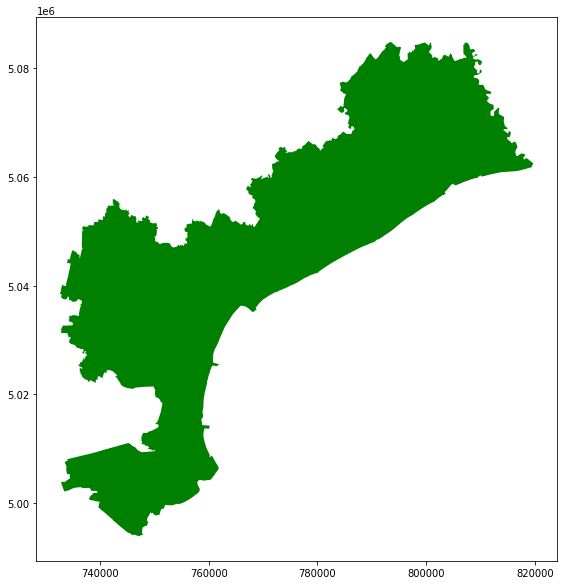

In [15]:
province_ve.plot(figsize=(10,10), color = "green")

2. load the shapefile of ISTAT with the informations of the muncipalities
 - identify the cities of the province selected with the biggest and smallest area
 - extract all the centroids of the areas expressed in WGS84
 - select all the muncipalities of the Province of Trento
 - extract a representative point for the area of each municipality converted in WGS84<br/>suggestion: *.representative_point()*
 - save the points in a GeoJSON file
 - calculate the distance on the geodentic between the municipality with the big area and smallest area by using the centroid

In [16]:
os.chdir("..")

In [17]:
os.listdir()

['ProvCM01012022', 'Com01012022', 'RipGeo01012022', 'Reg01012022']

In [18]:
os.chdir("Com01012022")

In [44]:
municipalities = gpd.read_file('Com01012022_WGS84.shp')

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
0,1,1,1,201,201,1077,001077,Chiaverano,None,0,1.202212e+07,18164.236621,"POLYGON ((414358.390 5042001.044, 414381.796 5..."
1,1,1,1,201,201,1079,001079,Chiesanuova,None,0,4.118911e+06,10777.318814,"POLYGON ((394621.039 5031581.116, 394716.100 5..."
2,1,1,1,201,201,1089,001089,Coazze,None,0,5.657268e+07,41591.122092,"POLYGON ((364914.897 4993224.894, 364929.991 4..."
3,1,1,1,201,201,1006,001006,Almese,None,0,1.787564e+07,17058.439037,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
4,1,1,1,201,201,1007,001007,Alpette,None,0,5.626076e+06,9795.562269,"POLYGON ((388890.737 5030465.123, 388945.987 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,2,5,26,0,26,26096,026096,Pieve del Grappa,None,0,3.733847e+07,33907.733890,"POLYGON ((720049.250 5087017.160, 720076.250 5..."
7900,2,4,22,0,22,22167,022167,San Michele all'Adige,None,0,1.599623e+07,26368.864693,"POLYGON ((667690.769 5121538.436, 667726.269 5..."
7901,1,3,15,215,215,15251,015251,Vermezzo con Zelo,None,0,1.073678e+07,21854.020935,"POLYGON ((498700.765 5028780.650, 498917.702 5..."
7902,2,4,22,0,22,22254,022254,Ville di Fiemme,None,0,4.614933e+07,42004.727128,"POLYGON ((692073.476 5137147.812, 692107.476 5..."


In [22]:
municipalities_ve = municipalities[municipalities.COD_PROV == 27]

In [40]:
municipalities_ve
max_area = municipalities_ve[municipalities_ve.Shape_Area == max(municipalities_ve.Shape_Area)]
max_area

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
3692,2,5,27,227,227,27042,027042,Venezia,None,1,4.158927e+08,170837.245485,"POLYGON ((780145.784 5049170.898, 780115.597 5..."


In [41]:
min_area = municipalities_ve[municipalities_ve.Shape_Area == min(municipalities_ve.Shape_Area)]
min_area

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
4027,2,5,27,227,227,27014,027014,Fiesso d'Artico,None,0,6.310360e+06,12438.301738,"POLYGON ((738094.087 5034858.534, 738130.087 5..."


In [42]:
max_area.geometry.centroid

3692    POINT (761575.782 5040356.852)
dtype: geometry

In [43]:
min_area.geometry.centroid

4027    POINT (737489.806 5034280.066)
dtype: geometry

In [47]:
municipalities_tn = municipalities[municipalities.COD_PROV == 22]
municipalities_tn

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
113,2,4,22,0,22,22172,022172,Segonzano,None,0,2.071212e+07,21551.885438,"POLYGON ((677853.445 5121202.433, 677866.071 5..."
114,2,4,22,0,22,22177,022177,Sover,None,0,1.482203e+07,18613.838987,"POLYGON ((680005.555 5123944.912, 680049.556 5..."
115,2,4,22,0,22,22195,022195,Terzolas,None,0,5.588756e+06,15881.333074,"POLYGON ((648742.270 5136116.640, 648747.308 5..."
116,2,4,22,0,22,22202,022202,Torcegno,None,0,1.519266e+07,27084.132189,"POLYGON ((685988.794 5110720.814, 686192.222 5..."
117,2,4,22,0,22,22216,022216,Vignola-Falesina,None,0,1.195139e+07,18513.867821,"POLYGON ((676220.190 5104829.691, 676235.390 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7691,2,4,22,0,22,22176,022176,Soraga di Fassa,None,0,1.974466e+07,32039.719169,"MULTIPOLYGON (((718464.880 5143378.251, 718432..."
7887,2,4,22,0,22,22252,022252,Borgo d'Anaunia,None,0,6.322874e+07,64924.029558,"MULTIPOLYGON (((660043.059 5153438.578, 660045..."
7889,2,4,22,0,22,22253,022253,Novella,None,0,4.658886e+07,44596.283777,"POLYGON ((658244.658 5151579.353, 658250.859 5..."
7900,2,4,22,0,22,22167,022167,San Michele all'Adige,None,0,1.599623e+07,26368.864693,"POLYGON ((667690.769 5121538.436, 667726.269 5..."


In [48]:
municipalities_tn.representative_point()

113     POINT (676302.556 5118105.841)
114     POINT (679341.985 5121538.930)
115     POINT (648376.533 5136183.365)
116     POINT (687816.630 5107356.745)
117     POINT (676558.021 5102246.448)
                     ...              
7691    POINT (705412.101 5141320.795)
7887    POINT (665123.705 5149219.490)
7889    POINT (659627.795 5144618.021)
7900    POINT (666600.295 5118698.956)
7902    POINT (688262.225 5132717.345)
Length: 166, dtype: geometry

In [49]:
municipalities_tn.to_crs(epsg=4326).to_file('municipalities_tn.geojson',driver='GeoJSON')

In [62]:
distance = max_area.geometry.centroid.distance(min_area.geometry.centroid.centroid.values[0]).values[0]
print(f"The distance between {min_area.COMUNE.values[0]} and {max_area.COMUNE.values[0]} is about {distance//1000} km")

The distance between Fiesso d'Artico and Venezia is about 24.0 km
